In [36]:
import pandas as pd
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv('data_deploy.csv', index_col=0)
df_raw=pd.read_csv('data_raw.csv', index_col=0)


In [40]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 37 to 9561
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   koi_score         2216 non-null   float64
 1   koi_impact        2216 non-null   float64
 2   koi_impact_err1   2216 non-null   float64
 3   koi_impact_err2   2216 non-null   float64
 4   koi_tce_plnt_num  2216 non-null   float64
 5   koi_steff_err1    2216 non-null   float64
 6   koi_steff_err2    2216 non-null   float64
 7   ra                2216 non-null   float64
 8   dec               2216 non-null   float64
dtypes: float64(9)
memory usage: 173.1 KB
None


In [42]:
display(df.describe())

,koi_score,koi_impact,koi_impact_err1,koi_impact_err2,koi_tce_plnt_num,koi_steff_err1,koi_steff_err2,ra,dec
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.000000,2216.000000,2216.000000,2216.000000
mean,0.964116,0.452041,0.230638,-0.297759,1.0,0.508065,0.554965,0.537242,0.465091
std,0.053128,0.364511,0.201462,0.232026,0.0,0.158463,0.172036,0.226101,0.233221
min,0.860000,0.000000,0.000000,-1.073200,1.0,0.000000,0.000000,0.000000,0.000000
25%,0.944000,0.123000,0.046000,-0.476125,1.0,0.363636,0.440000,0.361227,0.274123
50%,0.997000,0.372000,0.216700,-0.269550,1.0,0.563636,0.549630,0.551763,0.465925
75%,1.000000,0.748000,0.364300,-0.078075,1.0,0.618182,0.733333,0.718357,0.646755
max,1.000000,1.685500,0.841750,0.000000,1.0,1.000000,1.000000,1.000000,1.000000


In [44]:
# 3. Load the model for prediction (in your deployment environment)
with open('random_forest_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [46]:
prediction = loaded_model.predict(df)
print(f"Prediction (joblib): {prediction}")

Prediction (joblib): [1 1 1 ... 0 1 1]


In [48]:
print(prediction)

[1 1 1 ... 0 1 1]


In [50]:
print(prediction.dtype)

int64


In [52]:
df_raw['prediction'] = prediction
cols = df_raw.columns.tolist()
cols.remove('prediction')
cols.insert(0, 'prediction')
df_raw = df_raw[cols]
# Display the DataFrame with the new column
print(df_raw)

      prediction  koi_score  koi_period  koi_period_err1  koi_period_err2  \
37             1      1.000    4.959319     5.150000e-07    -5.150000e-07   
58             1      0.999   40.419504     1.139000e-04    -1.139000e-04   
62             1      0.993    7.240661     1.617000e-05    -1.617000e-05   
63             1      0.871    3.435916     4.729000e-05    -4.729000e-05   
72             1      0.860    1.626630     1.015000e-06    -1.015000e-06   
...          ...        ...         ...              ...              ...   
9550           1      0.860    4.736816     1.470000e-04    -1.470000e-04   
9551           1      0.860  130.235324     1.601218e-03    -1.601218e-03   
9557           0      1.000    8.870416     9.022000e-06    -9.022000e-06   
9558           1      1.000   47.109631     1.940000e-04    -1.940000e-04   
9561           1      0.860    1.739849     1.780000e-05    -1.780000e-05   

      koi_impact  koi_impact_err1  koi_impact_err2  koi_duration  \
37     

In [54]:
value_counts = df_raw['prediction'].value_counts()

print(value_counts)

prediction
1    2163
0      53
Name: count, dtype: int64


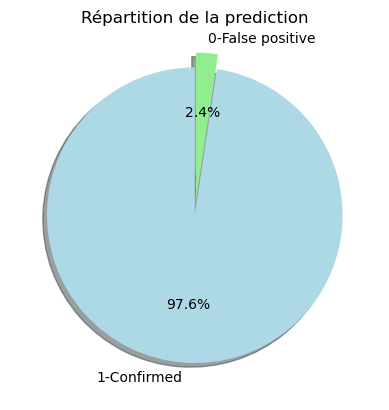

In [60]:
#Diagramme circulaire exploded

# Exemple de données
labels = ['1-Confirmed','0-False positive']  # Catégories
sizes = df_raw['prediction'].value_counts()  # Nombre d'occurrences ou proportions
colors = ['lightblue', 'lightgreen']  # Couleurs pour les catégories
explode = (0, 0.1)  # Décaler le deuxième segment

# Création du diagramme circulaire
#pieChart = axes[1, 1]
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',  # Affiche les pourcentages avec un chiffre après la virgule
    startangle=90,
    colors=colors,
    explode=explode,
    shadow=True
)

# Ajouter un titre
plt.title('Répartition de la prediction')

plt.show()